In [2]:
# 데이터 분석을 위한 판다스, 수치 계산을 위한 넘파이 불러오기
import pandas as pd
import numpy as np

# 버전 확인
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [3]:
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

# 경고 메시지를 띄우지 않고 출력 데이터를 깔끔하게 표시
import warnings
warnings.filterwarnings('ignore')


In [4]:
import os
import platform

base_path = "data"
file_name = "petition.csv" 
url = "https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4"

def file_exist_check(base_path, file_name):
    if os.path.exists(f"./{file_name}"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return
    
    if not os.path.exists(base_path):
        os.makedires(base_path)
        
    if platform.system() == "Linux":
        # 구글 드라이브에서 csv 파일을 읽어 오기 위해 gauth 인증하기
        #!pip install -U -q PyDrive
        from pydrive.auth import GoogleAuth
        from pydrive.drive import GoogleDrive
        # from google.colab import auth
        from oauth2client.client import GoogleCredentials
        
        # auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)
        
        id = url.split('=')[1]
        downloaded = drive.CreateFile({'id':id})
        downloaded.GetContentFile(f'{base_path}/{file_name}')
        
        print(f"사용자의 구글 드라이브에 {base_path}/{file_name} 다운로드 완료" )
    else:
        print(f"{url} 에서 다운로드해 실습 경로 {os.getcwd()}/{base_path}에 옮겨주세요.""")
        return
    
file_exist_check(base_path, file_name)


ApplicationDefaultCredentialsError: The Application Default Credentials are not available. They are available if running in Google Compute Engine. Otherwise, the environment variable GOOGLE_APPLICATION_CREDENTIALS must be defined pointing to a file defining the credentials. See https://developers.google.com/accounts/docs/application-default-credentials for more information.

In [5]:
petitions = pd.read_csv(f"{base_path}/petition.csv", index_col="article_id", parse_dates=['start', 'end'])
petitions.shape                                                                                          

(377756, 7)

In [6]:
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [7]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377756 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377756 non-null  datetime64[ns]
 1   end       377756 non-null  datetime64[ns]
 2   answered  377756 non-null  int64         
 3   votes     377756 non-null  int64         
 4   category  377756 non-null  object        
 5   title     377756 non-null  object        
 6   content   377755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [8]:
petitions.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [9]:
# 데이터 프레임의 열만 불러올 수 있다.
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [10]:
petitions.describe()


,start,end,answered,votes
count,377756,377756,377756.000000,3.777560e+05
mean,2018-05-15 05:35:15.155814912,2018-06-15 04:09:46.359449088,0.000077,1.514069e+02
min,2017-08-19 00:00:00,2017-08-26 00:00:00,0.000000,0.000000e+00
25%,2018-01-22 00:00:00,2018-02-21 00:00:00,0.000000,1.000000e+00
50%,2018-05-19 00:00:00,2018-06-18 00:00:00,0.000000,5.000000e+00
75%,2018-09-05 00:00:00,2018-10-05 00:00:00,0.000000,1.500000e+01
max,2019-01-09 00:00:00,2019-02-08 00:00:00,1.000000,1.192049e+06
std,NaN,NaN,0.008761,4.842551e+03


In [11]:
petitions['title'].describe(include='object')

count       377756
unique      330206
top       이명박 출국금지
freq          3018
Name: title, dtype: object

In [12]:
petitions.describe ?

SyntaxError: invalid syntax (2691644918.py, line 1)

In [13]:
# 숫자로 된 데이터에 대해 count, mean, std, min, max값 등을 볼 수 있다.
petitions.describe()

,start,end,answered,votes
count,377756,377756,377756.000000,3.777560e+05
mean,2018-05-15 05:35:15.155814912,2018-06-15 04:09:46.359449088,0.000077,1.514069e+02
min,2017-08-19 00:00:00,2017-08-26 00:00:00,0.000000,0.000000e+00
25%,2018-01-22 00:00:00,2018-02-21 00:00:00,0.000000,1.000000e+00
50%,2018-05-19 00:00:00,2018-06-18 00:00:00,0.000000,5.000000e+00
75%,2018-09-05 00:00:00,2018-10-05 00:00:00,0.000000,1.500000e+01
max,2019-01-09 00:00:00,2019-02-08 00:00:00,1.000000,1.192049e+06
std,NaN,NaN,0.008761,4.842551e+03


In [14]:
petitions.isnull().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

In [15]:
(petitions['votes'] > 200000) == 1

article_id
21        False
22        False
23        False
24        False
25        False
          ...  
492039    False
492040    False
492041    False
492042    False
492043    False
Name: votes, Length: 377756, dtype: bool

In [16]:
petitions['answer'] = (petitions['votes'] > 200000) == 1
petitions.shape

(377756, 8)

In [17]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


In [18]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
13577,2017-09-12,2017-09-19,0,20,육아/교육,사립유치원의 집단휴업을 반대합니다,국공립 유치원도 없고 국공립어린이집 들어가기도 힘든 실정에 사립유치원은 부모들의 어...,False,7 days
4213,2017-09-05,2017-09-12,0,1,인권/성평등,청소년 보호법이 아니라 소년법입니다...,소년법 폐지 청원합니다,False,7 days
4214,2017-09-05,2017-09-12,0,0,정치개혁,소년법 강화,이번 부산여중생 사건을보고 느낍니다.\n소년법 폐지해주셨으면 좋겠습니다.\n아님 강...,False,7 days


In [19]:
petitions['duration'].value_counts()

duration
30 days    366556
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: count, dtype: int64

In [20]:
petitions[(petitions['duration'] == '90 days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


In [21]:
petitions_60_answer = petitions[(petitions['duration'] == '60 days') & (petitions['answer'] == 1)]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(1, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


In [22]:
petitions_30_answer = petitions[(petitions['duration'] == '30 days') \
                                    & (petitions['answer'] == 1)]
print(petitions_30_answer.shape)
petitions_30_answer.head(3)

(75, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


In [23]:
petitions_7_answer = petitions[(petitions['duration'] == '7 days') \
                                   & (petitions['answer'] == 1)]
print(petitions_7_answer.shape)
petitions_7 = petitions[(petitions['duration'] == '7 days')]
print(petitions_7.shape)
petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True)

(0, 9)
(2436, 9)


,start,count
25,2017-08-19,9
21,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
22,2017-08-24,18
18,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


In [24]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738
3,안전/환경,29196
4,교통/건축/국토,26910
5,외교/통일/국방,25705
6,육아/교육,24861
7,보건복지,23608
8,일자리,22111
9,행정,19373


In [25]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 509일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [26]:
pd.pivot_table?


Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool | lib.NoDefault' = <no_default>,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    Keys to group by on the pivot table index. If a list is passed,
    it can contain any of the other types (except list). If an array is
    passed, it must be the same length as the data and will be used in
    the same manner as column values.
columns : column, Grouper

In [29]:
petitions_unique = pd.pivot_table(petitions[['category', 'answer', 'answered', 'votes']], index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best

,category,answer,answered,votes
0,인권/성평등,23,9,12225998
1,안전/환경,10,2,6512799
2,정치개혁,7,2,5686172
3,기타,7,1,4720310
4,육아/교육,3,1,4420589
5,보건복지,3,2,4269399
6,문화/예술/체육/언론,7,4,4086382
7,외교/통일/국방,4,1,3637926
8,교통/건축/국토,3,2,2834727
9,반려동물,4,0,2023905


In [32]:
petitions_start = pd.pivot_table(petitions[['start', 'answer', 'answered', 'votes']], index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]

,answer,answered,votes
start,,,
2018-10-17,1,0,1300523
2018-10-31,2,0,827096
2018-06-13,1,0,786157
2018-10-18,2,0,721524
2018-02-19,1,1,701520
2018-11-09,2,0,672819
2018-07-22,1,0,672491
2017-09-06,1,1,648209
2018-06-24,2,0,628925


In [33]:
# 인덱스로 되어있는 start를 키로 사용하기 위해 
# index로 설정된 start를 컬럼으로 변경해주고 인덱스를 생성한다.
votes_df = votes_df.reset_index()
votes_df.head()

,start,answer,answered,votes
0,2018-10-17,1,0,1300523
1,2018-10-31,2,0,827096
2,2018-06-13,1,0,786157
3,2018-10-18,2,0,721524
4,2018-02-19,1,1,701520


In [34]:
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.nlargest(5, "votes")

,start,counts,answer,answered,votes
113,2018-10-17,926,1,0,1300523
80,2018-10-31,1010,2,0,827096
365,2018-06-13,542,1,0,786157
73,2018-10-18,1032,2,0,721524
259,2018-02-19,698,1,1,701520


In [35]:
hottest_day_df.nlargest(5, "counts")

,start,counts,answer,answered,votes
0,2017-11-11,9623,0,0,85074
1,2017-09-05,5952,0,0,48808
2,2018-01-11,3368,0,0,44570
3,2018-02-06,2631,0,0,83038
4,2017-11-09,2487,0,0,34774


In [36]:
answered_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 77건


In [37]:
answered_df.head()

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


In [38]:
answered_df.sort_values('votes', ascending=False).head(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days


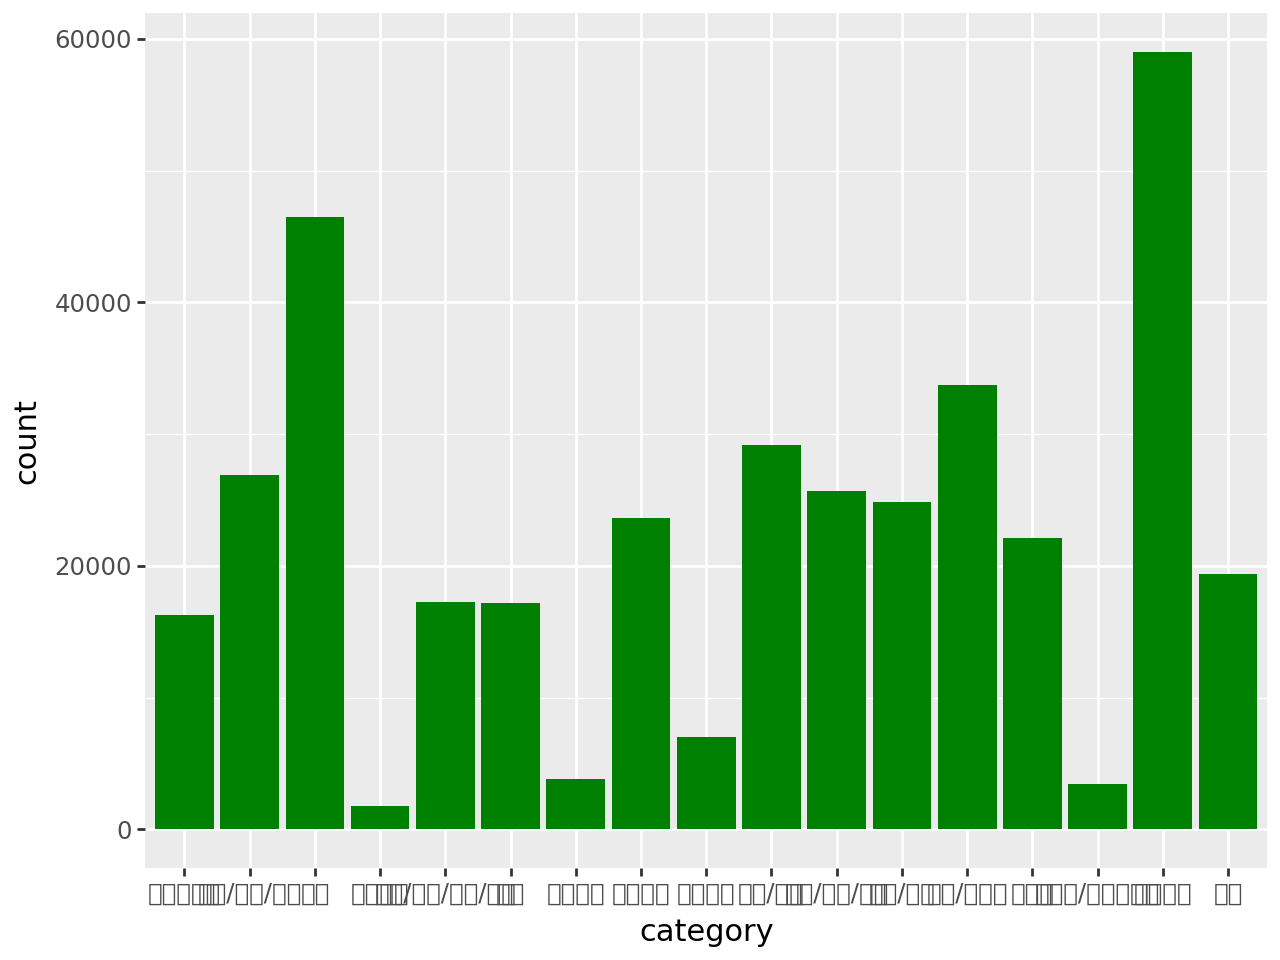

In [39]:
# 카테고리별로 집계된 데이터를 barplot으로 그려본다.
# 그런데 한글이 깨져보이는 것을 볼 수 있다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
)

In [40]:
#!pip install koreanize-matplotlib

In [41]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'
 
font_family = 'NanumGothic'
font_family

'NanumGothic'

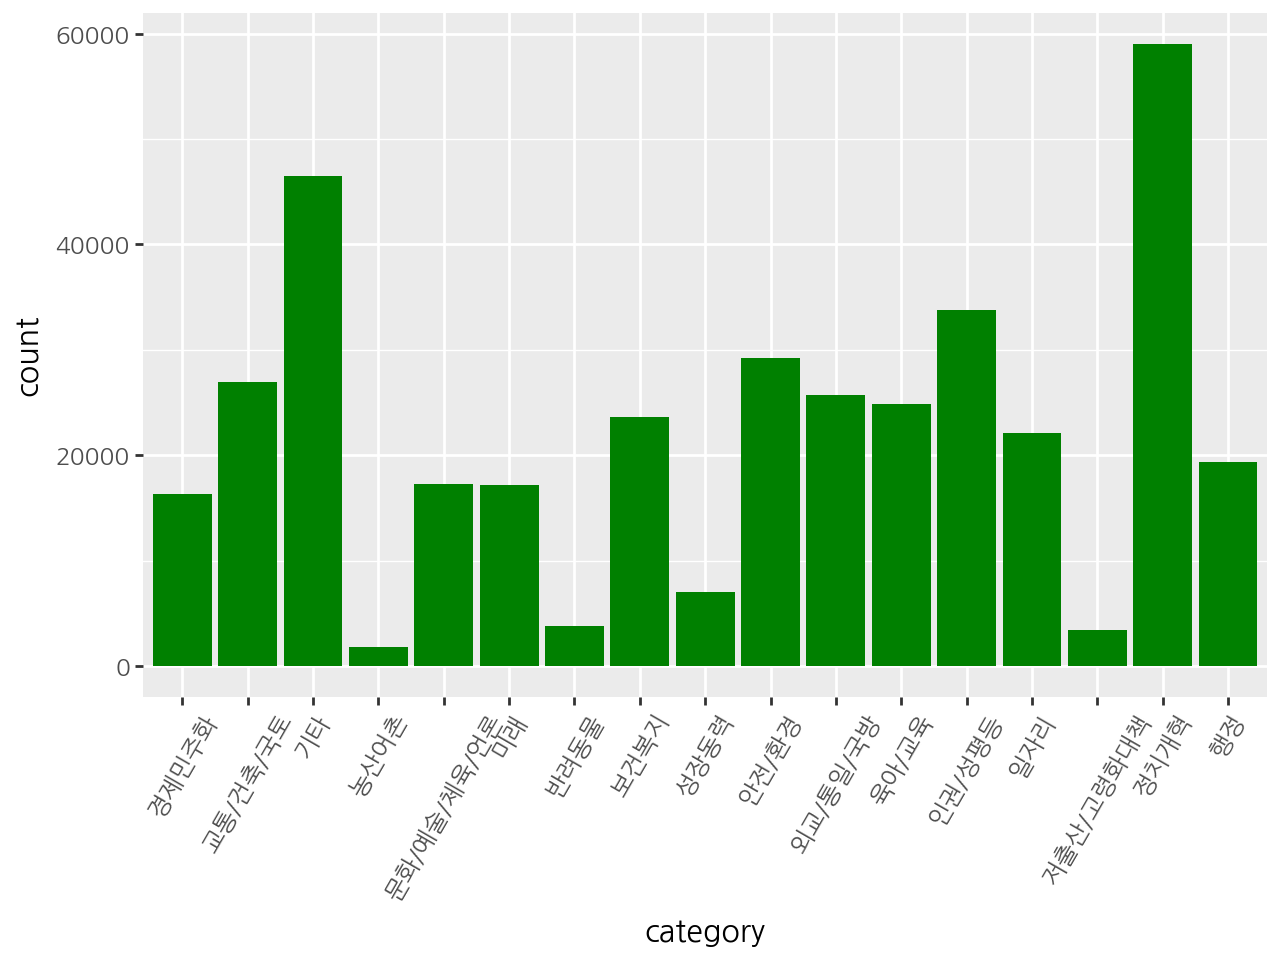

In [42]:
# 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family=font_family),
        axis_text_x=element_text(rotation=60))
)

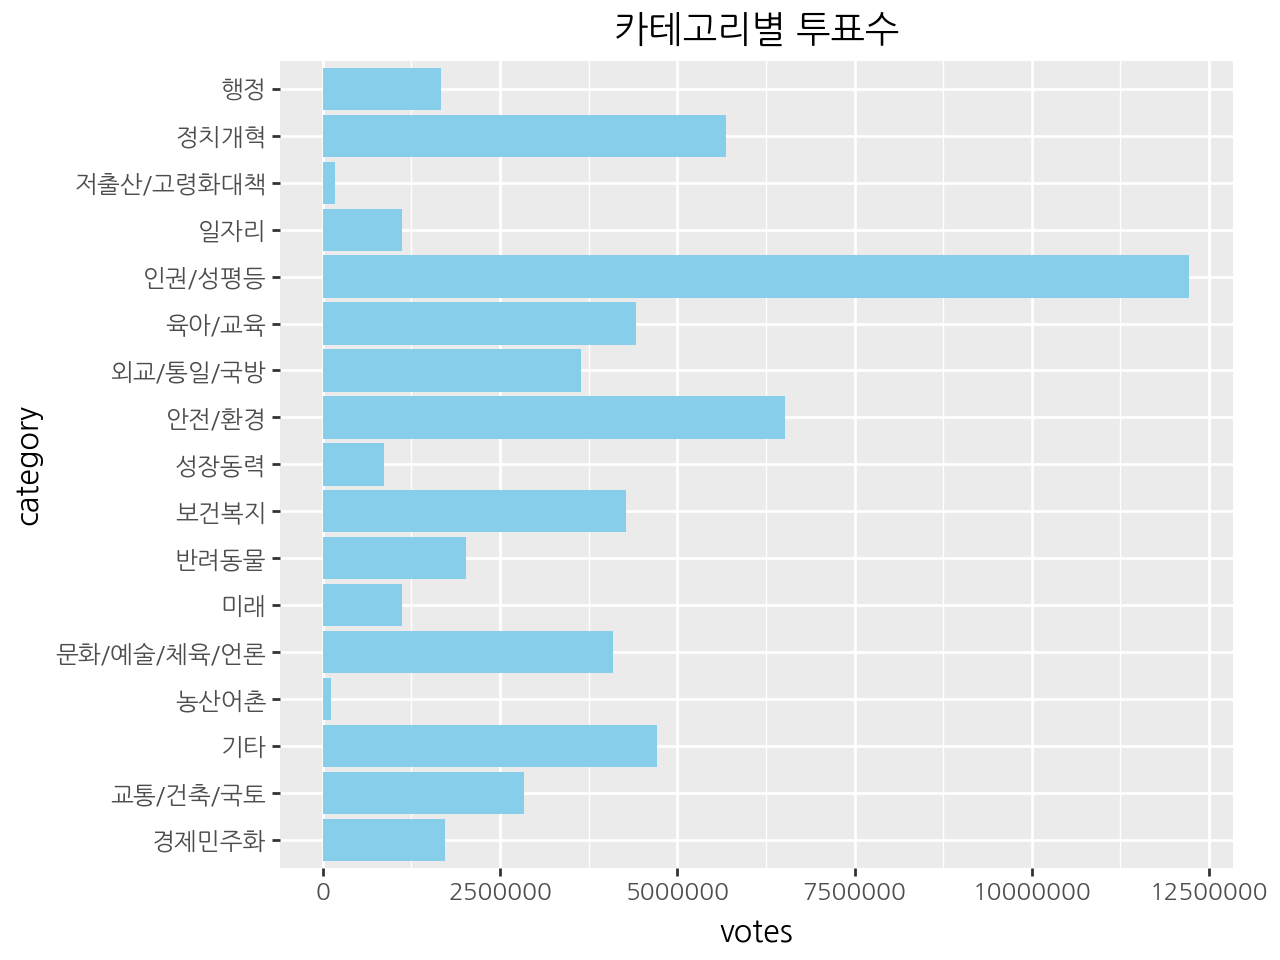

In [43]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family=font_family))
)

In [44]:
# 투표를 가장 많이 받은 카테고리인 인권/성평등에서 투표수가 많은 순으로 보기
human = petitions.loc[(petitions['category']=='인권/성평등')]
human.sort_values('votes', ascending=False)[:2]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days


In [45]:
petition_votes = petitions.groupby(['start'])['votes'].sum().reset_index()
petition_votes.columns = ['start', 'votes']
petition_votes.head()

,start,votes
0,2017-08-19,20703
1,2017-08-20,31710
2,2017-08-21,1884
3,2017-08-22,2607
4,2017-08-23,13446


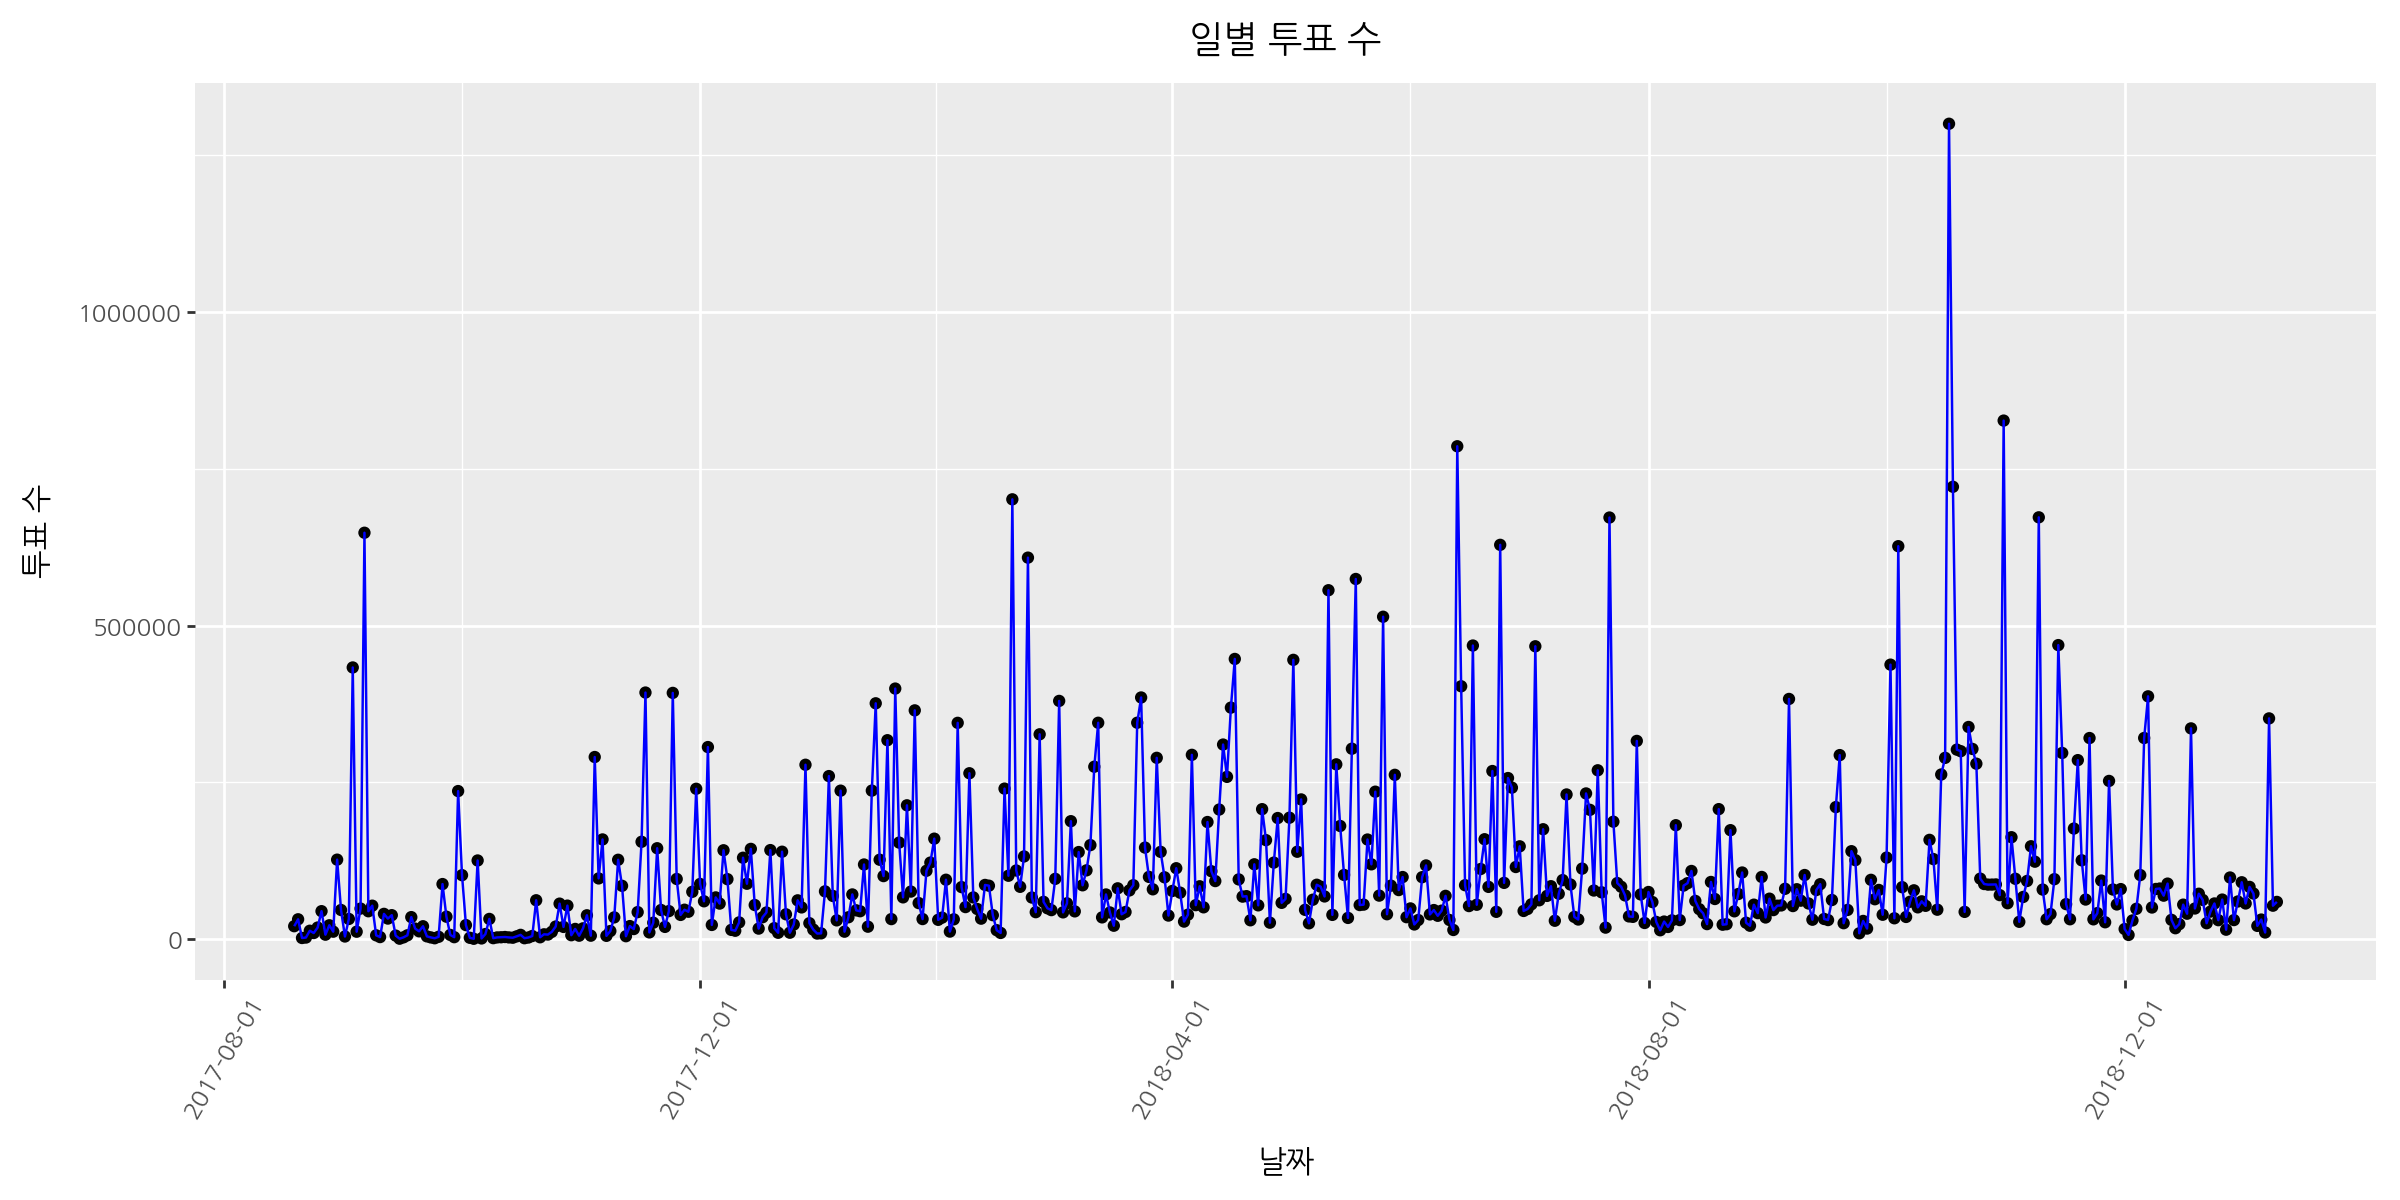

In [46]:
(ggplot(petition_votes)
 + aes(x='start', y='votes')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='투표 수', title='일별 투표 수')
 + theme(text=element_text(family=font_family),
        figure_size=(12,6),
        axis_text_x=element_text(rotation=60))
)

In [47]:
petition_votes[petition_votes['votes'] > 1000000]

,start,votes
424,2018-10-17,1300523


In [48]:
petitions[(petitions['start'] == '2018-10-17') &
          (petitions['votes'] > 1000000)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
